# Проект 2. Разведывательный анализ данных

### Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

# Первичный осмотр данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy import interpolate
import warnings

# убираем предупреждения по библиотеки seaborn:
warnings.simplefilter('ignore')

# будем использовать более удобный для восприятия стиль:
sns.set_theme(style='whitegrid')

pd.set_option('display.max_columns', 30)

In [2]:
db = pd.read_csv(r'C:\Users\mailk\PycharmProjects\SkillF\Mod.2 - EDA\stud_math.csv')
df = db.copy()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Посмотрим на наличие пропусков в наших данных:

In [4]:
df.isnull().sum().sort_values()

school                  0
sex                     0
age                     0
Medu                    3
score                   6
studytime, granular     7
studytime               7
goout                   8
schoolsup               9
freetime               11
absences               12
activities             14
health                 15
nursery                16
address                17
reason                 17
Mjob                   19
higher                 20
failures               22
Fedu                   24
famrel                 27
famsize                27
traveltime             28
guardian               31
romantic               31
internet               34
Fjob                   36
famsup                 39
paid                   40
Pstatus                45
dtype: int64

<AxesSubplot:>

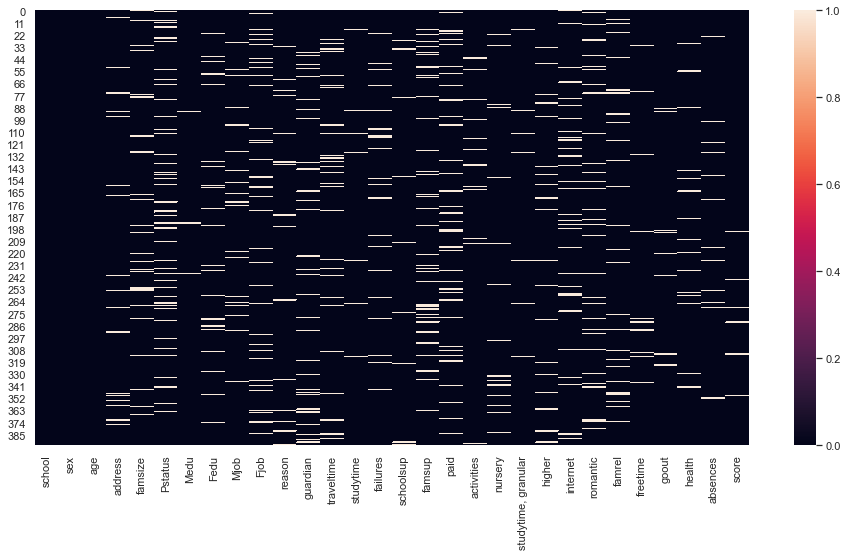

In [5]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.isnull())

#### Сразу оговоримся что пропуски заполнять случайными или самыми часто встречающимися значениями не будем, т.к. это с моей точки зрения не добавит модели точности (хотя возможно я и ошибаюсь, но на данном этапе обучения у меня не было информации на основании которой я мог бы сделать правильные выводы на этот счет), и будем пользоваться принципом "лучше меньше, да лучше".

#### В датафрейме представленны данные о 395 учениках, присутствуют 13 числовых и 17 номинативных параметра. Так же видим что во всех параметрах, кроме первых трех, присутствуют пустые значения. Максимальное кол-во попущенных данных присутствует в параметрах: 'Pstatus', 'famsize', 'paid' и составляет 10-11%. Можем говорить о том что пропуски в целом по датасэту распределены равномерно.

# Предобработка

In [6]:
def diff_mean_values(column, value_max, value_min):
    '''
    функция для вычисления разницы между средней величиной крайних значений исследуемого параметра
    '''
    mean_max = round(df.score[df[column] == value_max].mean(), 2)
    mean_min = round(df.score[df[column] == value_min].mean(), 2)
    diff_percent = round(((mean_max / mean_min - 1) * 100), 1)
    return print(f'  Для {column}={value_max} оценки на {diff_percent}% лучше чем для {column}={value_min} \
    (mean: {mean_max} против {mean_min})')


def diff_score0_counts(column):
    '''
    функция для вычисления разницы между двумя крайними значениями исследуемого параметра для группы 'score=0'
    '''
    df_score0 = pd.concat([df[column][df.score == 0].value_counts(), df[column].value_counts()], 
                          axis=1, keys=['score_0', 'df_all'])
    df_score0['normalize_%'] = (df_score0.score_0 / df_score0.df_all) * 100
    diff_perc = round(df_score0['normalize_%'].max() - df_score0['normalize_%'].min(), 1)
    return print(df_score0.sort_index(), f'  Для группы score=0 разница кол-ва нулевых оценок составляет: {diff_perc}%', sep='\n')
    
    
results = dict()    # создадим словарь, куда в последствии будем вносить краткое резюме по каждому параметру.

# Сделаем проверку по каждому параметру на предмет наличия ошибок, выбросов и корреляции с ключевым параметром score

#### Критерием для принятия промежуточного решения об включении исследуемых параметров в модель обозначим уровень значимости в 10%, тоесть минимум на такую величину должны отличатся средние оценки по двум крайним значениям одного параметра. Ключевым параметром для колличественных характеристик будем использовать среднее (mean) по оценкам по математике.

Начнем анализ с последнего и самого главного параметра - score, что бы далее было легче иследовать его корреляцию с остальными параметрами.

P.S. Далее по тексту, в подзаголовках анализа каждого параметра, запись формируется следующим образом:
"x name - описание", где x - номер столбца, name - название столбца, и далее описание данного параметра.

### 30 score — баллы по госэкзамену по математике

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

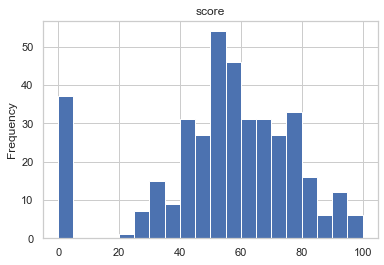

In [7]:
df.score.plot(kind='hist', title='score', bins=20)
df.score.describe()

In [8]:
df.score[df.score == 0].value_counts()

0.0    37
Name: score, dtype: int64

In [9]:
df.score.isnull().sum()

6

Удалим из датафрейма строки с пустыми значениями в ключевом параметре - score (6 строк):

In [10]:
df.drop(df[pd.isnull(df.score)].index, inplace=True)

#### Основные наблюдения:
    1) с левой стороны наблюдаем аномальный выброс: 37 оценок на "0" баллов по госэкзамену;
    2) в диапазоне: [1, 19] - разрыв, нет ни одной оценки; 
    3) в диапазоне: [20, 100] - условно нормальное распределение со средним значением 52 балла.

#### По данному выбросу (37оценок - 0 баллов), можем сделать предположения:
    1) возможно на экзамене не выставляются баллы, в случаи если их набрали меньше 20;
    2) оценка в 0 баллов выставляется за отсутствие на экзамене по каким-либо причинам;
    3) действительно 37 учеников не смогли набрать на экзамене ни одного балла.
   
#### Учитывая что существует два предположения в пользу того что бы эти оценки учитывать (№1 и №3) - оставим их для анализа в нашей модели.

#### Судя по характеру распределения оценок - в дальнейшем нам нужно будет сделать модель предсказывающую среднюю оценку и вероятность сдачи экзамена на 0. Соответственно будем рассматривать влияние всех параметров в двух ситуациях:

    1) в целом по всем значениям (обозначим как df_all);
    2) отдельно для группы набравшей 0 баллов (обозначим как score=0).

В словарь с итоговым результатом анализа каждого параметра (results) будем делать две записи для кажого иследуемого параметра для групп: score=0 и df_all. Так же символьно будем указывать наличие значимой взаимосвязи исследуемого параметра с итоговой оценкой:

    '+' - присутствует статистически-значимая зависимость (отличия более чем на 5%);
    '0' - для параметров с низкой зависимостью (отличия менее чем на 5%).

### 1 school — аббревиатура школы, в которой учится ученик

#### 1. Построим боксплот для исследования зависимости оценок по математике от значений исследуемого параметра:

GP    344
MS     45
Name: school, dtype: int64

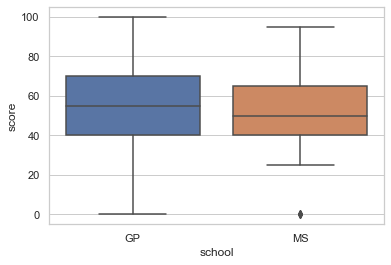

In [11]:
sns.boxplot(x="school", y="score", data=df)
df.school.value_counts()

#### 2. Проверим статистическое отличие усредненных оценок для крайних случеев исследуемого параметра:

In [12]:
diff_mean_values('school', 'GP', 'MS')

  Для school=GP оценки на 6.5% лучше чем для school=MS     (mean: 52.63 против 49.44)


#### 3. Найдем разницу между двумя крайними значениями исследуемого параметра для группы 'score=0'

In [13]:
diff_score0_counts('school')

    score_0  df_all  normalize_%
GP       33     344     9.593023
MS        4      45     8.888889
  Для группы score=0 разница кол-ва нулевых оценок составляет: 0.7%


#### 4. Сформулируем основные наблюдения:
    1) Данные приведены всего по двум школам: GP и MS. Пустых полей и ошибок заполнения нет;
    2) По группе df_all: по школе GP - оценки на 6.5% лучше чем по школе MS;
    3) По группе score=0, отличие незначительное: 0.8%.

#### 5. Занесем результаты наблюдения в словарь:

In [14]:
results['df_all school: 0'] = 'Для school=GP оценки на 6.5% лучше чем для school=MS'
results['score=0 school: 0'] = 'Разница кол-ва нулевых оценок составляет: 0.8%'

### 2 sex — пол ученика ('F' - женский, 'M' - мужской)

F    204
M    185
Name: sex, dtype: int64

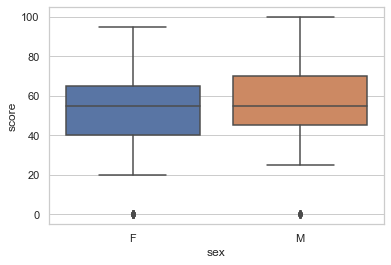

In [15]:
sns.boxplot(x="sex", y="score", data=df)
df.sex.value_counts()

In [16]:
diff_mean_values('sex', 'M', 'F')

  Для sex=M оценки на 9.1% лучше чем для sex=F     (mean: 54.65 против 50.1)


In [17]:
diff_score0_counts('sex')

   score_0  df_all  normalize_%
F       22     204    10.784314
M       15     185     8.108108
  Для группы score=0 разница кол-ва нулевых оценок составляет: 2.7%


In [18]:
results['df_all sex: 0'] = 'Для sex=M оценки на 9.1% лучше чем для sex=F'
results['score=0 sex: 0'] = 'Нулевых оценок по мужскому полу меньше, чем по женскому всего на 2.6%'

### 3 age — возраст ученика (от 15 до 22)

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

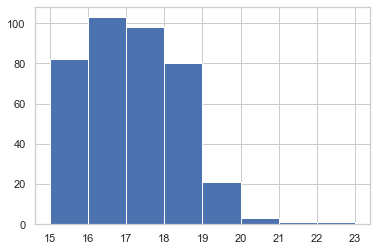

In [19]:
df.age.hist(bins=8, range=(15, 23))
df.age.describe()

<AxesSubplot:xlabel='age', ylabel='score'>

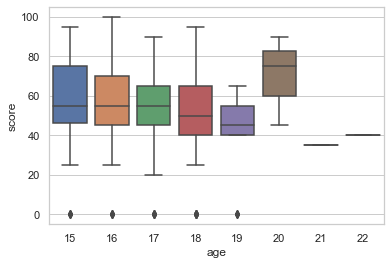

In [20]:
sns.boxplot(x="age", y="score", data=df)

In [21]:
diff_mean_values('age', 15, 19)

  Для age=15 оценки на 39.9% лучше чем для age=19     (mean: 56.28 против 40.24)


Если не учитывать данные по очень малочисленной возрасной группе в 20 лет (всего таких 3чел, <1%), то видим четко выраженную тенденцию по снижению всех основных статистических характеристик по всем возрастным группам. Так же учитывая очень малое кол-во данных что бы утверждать что возратная группа "20 лет" склонна выбиваться из тенденции остальных возрастных групп и сдавать экзамены лучше, удалим эти данные из датафрейма:

In [22]:
df.age[df.age == 20] = None

In [23]:
diff_score0_counts('age')

      score_0  df_all  normalize_%
15.0      6.0      82     7.317073
16.0      7.0     103     6.796117
17.0      8.0      98     8.163265
18.0     11.0      80    13.750000
19.0      5.0      21    23.809524
21.0      NaN       1          NaN
22.0      NaN       1          NaN
  Для группы score=0 разница кол-ва нулевых оценок составляет: 17.0%


Видим выраженную тенденцию: с ростом возраста % учеников сдавших на "0" значительно возрастает (с 7% до 21%).

In [24]:
results['df_all age: +'] = 'Для age=15 оценки на 39.9% лучше чем для age=19'
results['score=0 age: +'] = 'Разница кол-ва нулевых оценок составляет: 14.1%'

### 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

U    291
R     83
Name: address, dtype: int64

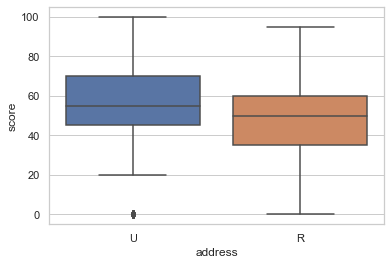

In [25]:
sns.boxplot(x='address', y='score', data=df)
df.address.value_counts()

In [26]:
diff_mean_values('address', 'U', 'R')

  Для address=U оценки на 14.1% лучше чем для address=R     (mean: 53.57 против 46.93)


In [27]:
diff_score0_counts('address')

   score_0  df_all  normalize_%
R       10      83    12.048193
U       26     291     8.934708
  Для группы score=0 разница кол-ва нулевых оценок составляет: 3.1%


In [28]:
results['df_all address: +'] = 'Для address=U оценки на 14.1% лучше чем для address=R'
results['score=0 address: 0'] = 'Разница кол-ва нулевых оценок составляет: 3.2%'

### 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

GT3    255
LE3    107
Name: famsize, dtype: int64

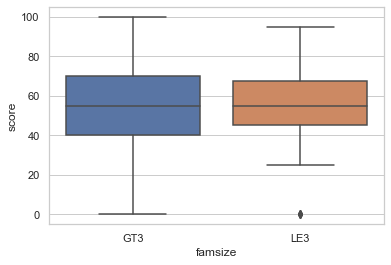

In [29]:
sns.boxplot(x='famsize', y='score', data=df)
df.famsize.value_counts()

In [30]:
diff_mean_values('famsize', 'LE3', 'GT3')

  Для famsize=LE3 оценки на 6.1% лучше чем для famsize=GT3     (mean: 54.67 против 51.51)


In [31]:
diff_score0_counts('famsize')

     score_0  df_all  normalize_%
GT3       27     255    10.588235
LE3        7     107     6.542056
  Для группы score=0 разница кол-ва нулевых оценок составляет: 4.0%


In [32]:
results['df_all famsize: 0'] = 'Для famsize=LE3 оценки на 6.1% лучше чем для famsize=GT3'
results['score=0 famsize: 0'] = 'Разница кол-ва нулевых оценок составляет: 3.8%'

### 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

T    308
A     36
Name: Pstatus, dtype: int64

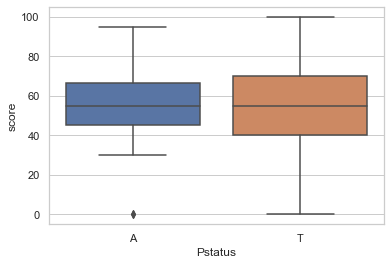

In [33]:
sns.boxplot(x='Pstatus', y='score', data=df)
df.Pstatus.value_counts()

In [34]:
diff_mean_values('Pstatus', 'A', 'T')

  Для Pstatus=A оценки на 6.7% лучше чем для Pstatus=T     (mean: 55.14 против 51.7)


In [35]:
diff_score0_counts('Pstatus')

   score_0  df_all  normalize_%
A        2      36     5.555556
T       31     308    10.064935
  Для группы score=0 разница кол-ва нулевых оценок составляет: 4.5%


In [36]:
results['df_all Pstatus: 0'] = 'Для Pstatus=A оценки на 6.7% лучше чем для Pstatus=T'
results['score=0 Pstatus: 0'] = 'Разница кол-ва нулевых оценок составляет: 4.3%'

### 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

0.0      3
1.0     56
2.0    100
3.0     96
4.0    131
Name: Medu, dtype: int64

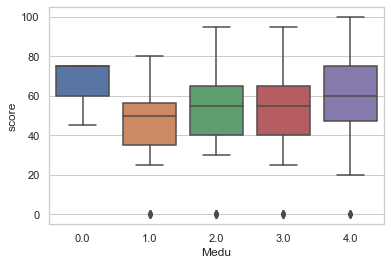

In [37]:
sns.boxplot(x='Medu', y='score', data=df)
df.Medu.value_counts().sort_index()

По основным статистическим характеристикам прослеживается положительная взаимосвязь: чем выше уровень образование матери, - тем выше оценки по математике, за исключением малочисленной группы: Medu=0. Учитывая очень малое кол-во данных в этой группе (3чел, что <1% от всей выборки) и отсутствие логически-обоснованных оснований доверять такой тенденции, - удалим эти данные из датафрейма:

In [38]:
df.Medu[df.Medu == 0] = None

In [39]:
diff_mean_values('Medu', 4, 1)

  Для Medu=4 оценки на 36.4% лучше чем для Medu=1     (mean: 58.82 против 43.12)


In [40]:
diff_score0_counts('Medu')

     score_0  df_all  normalize_%
1.0        9      56    16.071429
2.0       12     100    12.000000
3.0        9      96     9.375000
4.0        6     131     4.580153
  Для группы score=0 разница кол-ва нулевых оценок составляет: 11.5%


In [41]:
results['df_all Medu: +'] = 'Для Medu=4 оценки на 36.4% лучше чем для Medu=1'
results['score=0 Medu: +'] = 'По Medu=4 кол-во нулевых оценок на 10.7% лучше чем по Medu=1'

### 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [42]:
df.Fedu.value_counts().sort_index()

0.0       2
1.0      75
2.0     105
3.0      94
4.0      88
40.0      1
Name: Fedu, dtype: int64

Убирем ошибочное значение для параметра Fedu: '40'

In [43]:
df.loc[df.Fedu > 4, 'Fedu'] = None

<AxesSubplot:xlabel='Fedu', ylabel='score'>

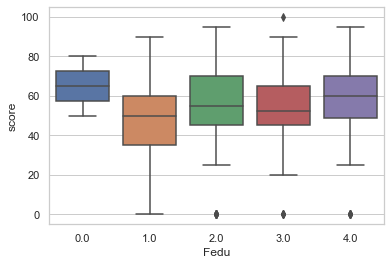

In [44]:
sns.boxplot(x="Fedu", y="score", data=df)

По основным статистическим характеристика прослеживается положительная взаимосвязь: чем выше уровень образование отца, - тем выше оценки по математике, за исключением малочисленной группы: Fedu=0 (2чел, <1% выборки). Учитывая очень малое кол-во данных в этой группе и отсутствие логически-обоснованных оснований доверять такой тенденции, - удалим эти данные из датафрейма:

In [45]:
df.Fedu[df.Fedu == 0] = None

In [46]:
diff_mean_values('Fedu', 4, 1)

  Для Fedu=4 оценки на 20.2% лучше чем для Fedu=1     (mean: 55.68 против 46.33)


In [47]:
diff_score0_counts('Fedu')

     score_0  df_all  normalize_%
1.0       10      75    13.333333
2.0       11     105    10.476190
3.0        5      94     5.319149
4.0        8      88     9.090909
  Для группы score=0 разница кол-ва нулевых оценок составляет: 8.0%


In [48]:
results['df_all Fedu: +'] = 'Для Fedu=4 оценки на 20.2% лучше чем для Fedu=1'
results['score=0 Fedu: 0'] = 'по Fedu=3 кол-во нулевых оценок на 7.6% лучше чем по Fedu=1'

### 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

other       127
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

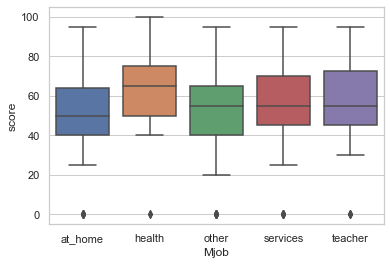

In [49]:
sns.boxplot(x='Mjob', y='score', data=df)
df.Mjob.value_counts()

In [50]:
diff_mean_values('Mjob', 'health', 'at_home')

  Для Mjob=health оценки на 32.7% лучше чем для Mjob=at_home     (mean: 60.62 против 45.69)


In [51]:
diff_score0_counts('Mjob')

          score_0  df_all  normalize_%
at_home         9      58    15.517241
health          2      32     6.250000
other          12     127     9.448819
services        8      98     8.163265
teacher         4      55     7.272727
  Для группы score=0 разница кол-ва нулевых оценок составляет: 9.3%


In [52]:
results['df_all Mjob: +'] = 'Для Mjob=health оценки на 32.7% лучше чем для Mjob=at_home'
results['score=0 Mjob: 0'] = 'По Mjob=health кол-во нулевых оценок на 9% лучше чем по Mjob=at_home'

### 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

other       194
services     99
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

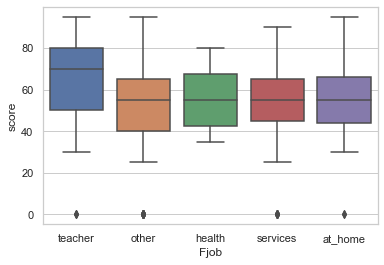

In [53]:
sns.boxplot(x='Fjob', y='score', data=df)
df.Fjob.value_counts()

In [54]:
diff_mean_values('Fjob', 'teacher', 'at_home')

  Для Fjob=teacher оценки на 15.3% лучше чем для Fjob=at_home     (mean: 59.83 против 51.88)


#### По колличественному критерию отбора (мин. 10% в разности средних оценок для крайних значений параметра) - данный параметр проходит, но учитывая низкую выборку (< 30 значений) для трех параметров из пяти (teacher, at_home, health) - не будем включать данный параметр в модель.

In [55]:
diff_score0_counts('Fjob')

          score_0  df_all  normalize_%
at_home       2.0      16    12.500000
health        NaN      15          NaN
other        18.0     194     9.278351
services     10.0      99    10.101010
teacher       3.0      29    10.344828
  Для группы score=0 разница кол-ва нулевых оценок составляет: 3.2%


Видим, что для группы score=0 для параметра Fjob=health - отсутствуют нулевые оценки по математике, - что не очень хорошо для прогнозирующей модели.

#### При этом обратим внимание что для обоих параметров (Mjob и Fjob) при анализе группы сдавших экзамен на "0", видим одну и туже взаимосвязь:
    - минимальный процент сдавших на "0" для группы health (Mjob-6% и Fjob-0%);
    - максимальный процент сдавших на "0" для группы at_home (Mjob-15.5% и Fjob-12.5%);

#### Учитывая, во первых, большую корреляцию данных между Mjob и Fjob (для группы score=0) и во вторых, отсутствие нулевых оценок по математике для параметра Fjob=health, - исключим парметр Fjob для группы score=0

In [56]:
results['df_all Fjob: 0'] = 'Для Fjob=teacher оценки на 15.3% лучше чем для Fjob=at_home. Низкая выборка'
results['score=0 Fjob: 0'] = 'Большая корреляция данных с Mjob'

### 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

course        135
reputation    102
home          101
other          34
Name: reason, dtype: int64

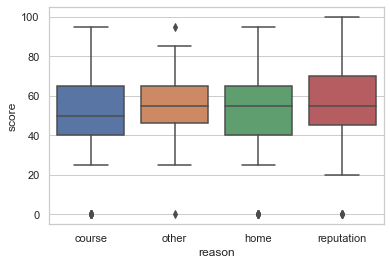

In [57]:
sns.boxplot(x='reason', y='score', data=df)
df.reason.value_counts()

In [58]:
diff_mean_values('reason', 'reputation', 'course')

  Для reason=reputation оценки на 11.7% лучше чем для reason=course     (mean: 55.64 против 49.81)


In [59]:
diff_score0_counts('reason')

            score_0  df_all  normalize_%
course           16     135    11.851852
home             12     101    11.881188
other             1      34     2.941176
reputation        6     102     5.882353
  Для группы score=0 разница кол-ва нулевых оценок составляет: 8.9%


In [60]:
results['df_all reason: +'] = 'Для reason=reputation оценки на 11.7% лучше чем для reason=course'
results['score=0 reason: 0'] = 'По reason=other кол-во нулевых оценок на 8.7% лучше чем по reason=course'

### 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

mother    248
father     86
other      24
Name: guardian, dtype: int64

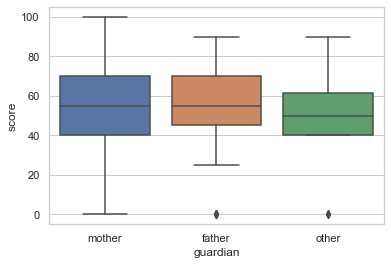

In [61]:
sns.boxplot(x='guardian', y='score', data=df)
df.guardian.value_counts()

In [62]:
diff_mean_values('guardian', 'mother', 'other')

  Для guardian=mother оценки на 15.3% лучше чем для guardian=other     (mean: 52.6 против 45.62)


In [63]:
diff_score0_counts('guardian')

        score_0  df_all  normalize_%
father        8      86     9.302326
mother       23     248     9.274194
other         4      24    16.666667
  Для группы score=0 разница кол-ва нулевых оценок составляет: 7.4%


In [64]:
results['df_all guardian: +'] = 'Для guardian=mother оценки на 15.3% лучше чем для guardian=other'
results['score=0 guardian: 0'] = 'Для двух крайних значений разница кол-ва нулевых оценок составляет: 5.1%'

### 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

1.0    239
2.0     94
3.0     21
4.0      7
Name: traveltime, dtype: int64

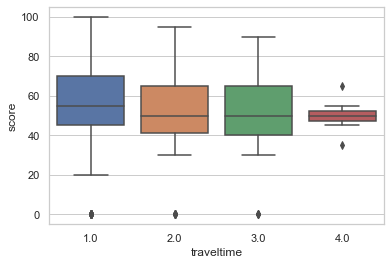

In [65]:
sns.boxplot(x='traveltime', y='score', data=df)
df.traveltime.value_counts()

In [66]:
diff_mean_values('traveltime', 1, 4)

  Для traveltime=1 оценки на 7.2% лучше чем для traveltime=4     (mean: 53.58 против 50.0)


In [67]:
diff_score0_counts('traveltime')

     score_0  df_all  normalize_%
1.0     20.0     239     8.368201
2.0      8.0      94     8.510638
3.0      4.0      21    19.047619
4.0      NaN       7          NaN
  Для группы score=0 разница кол-ва нулевых оценок составляет: 10.7%


Данные по группе score=0 для  traveltime не будем учитывать, т.к. traveltime=4 вносит не корректную тенденцию в модель.

In [68]:
results['df_all traveltime: 0'] = 'Для traveltime=1 оценки на 7.2% лучше чем для traveltime=4'
results['score=0 traveltime: 0'] = 'Слишком не нормальное распределение нулевых оценок'

### 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

2.0    189
1.0    103
3.0     63
4.0     27
Name: studytime, dtype: int64

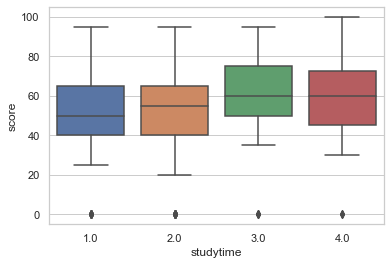

In [69]:
sns.boxplot(x='studytime', y='score', data=df)
df.studytime.value_counts()

In [70]:
diff_mean_values('studytime', 4, 1)

  Для studytime=4 оценки на 13.8% лучше чем для studytime=1     (mean: 56.3 против 49.47)


In [71]:
diff_score0_counts('studytime')

     score_0  df_all  normalize_%
1.0       13     103    12.621359
2.0       16     189     8.465608
3.0        5      63     7.936508
4.0        3      27    11.111111
  Для группы score=0 разница кол-ва нулевых оценок составляет: 4.7%


In [72]:
results['df_all studytime: +'] = 'Для studytime=4 оценки на 13.8% лучше чем для studytime=1'
results['score=0 studytime: 0'] = 'Для двух крайних значений разница кол-ва нулевых оценок составляет: 4.8%'

### 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

0.0    290
1.0     48
2.0     15
3.0     14
Name: failures, dtype: int64

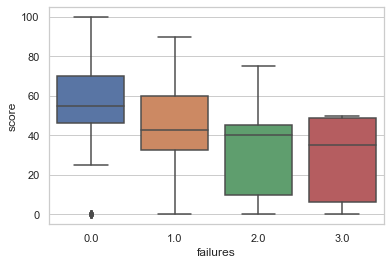

In [73]:
sns.boxplot(x='failures', y='score', data=df)
df.failures.value_counts()

#### Учитывая низкую выборку для значений n = [2, 3] и существенное отличие между средними оценками для n=0 и n =[1, 2, 3] объеденим в одну группу значения [1, 2, 3]:

In [74]:
df.failures[df.failures > 0] = 1

<AxesSubplot:xlabel='failures', ylabel='score'>

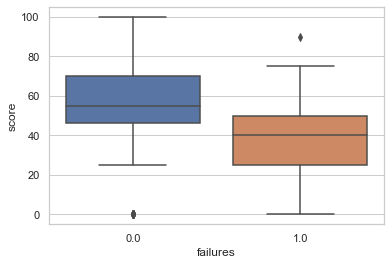

In [75]:
sns.boxplot(x='failures', y='score', data=df)

In [76]:
diff_mean_values('failures', 0, 1)

  Для failures=0 оценки на 53.1% лучше чем для failures=1     (mean: 56.05 против 36.62)


In [77]:
diff_score0_counts('failures')

     score_0  df_all  normalize_%
0.0       17     290     5.862069
1.0       18      77    23.376623
  Для группы score=0 разница кол-ва нулевых оценок составляет: 17.5%


In [78]:
results['df_all failures: +'] = 'Для failures=0 оценки на 53% лучше чем для failures=1'
results['score=0 failures: +'] = 'Для двух крайних значений разница кол-ва нулевых оценок составляет: 16.7%'

### 16 schoolsup — дополнительная образовательная поддержка (yes или no)

no     331
yes     49
Name: schoolsup, dtype: int64

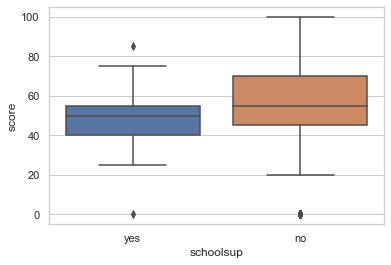

In [79]:
sns.boxplot(x='schoolsup', y='score', data=df)
df.schoolsup.value_counts()

In [80]:
diff_mean_values('schoolsup', 'no', 'yes')

  Для schoolsup=no оценки на 12.9% лучше чем для schoolsup=yes     (mean: 53.13 против 47.04)


In [81]:
diff_score0_counts('schoolsup')

     score_0  df_all  normalize_%
no        36     331    10.876133
yes        1      49     2.040816
  Для группы score=0 разница кол-ва нулевых оценок составляет: 8.8%


In [82]:
results['df_all schoolsup: +'] = 'Для schoolsup=no оценки на 12.9% лучше чем для schoolsup=yes'
results['score=0 schoolsup: 0'] = 'Для двух крайних значений разница кол-ва нулевых оценок составляет: 8.8%'

### 17 famsup — семейная образовательная поддержка (yes или no)

yes    216
no     135
Name: famsup, dtype: int64

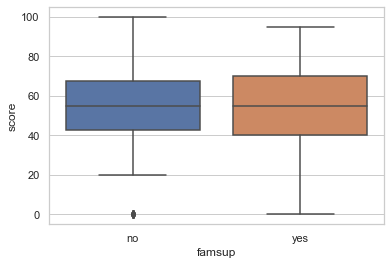

In [83]:
sns.boxplot(x='famsup', y='score', data=df)
df.famsup.value_counts()

In [84]:
diff_mean_values('famsup', 'no', 'yes')

  Для famsup=no оценки на 0.7% лучше чем для famsup=yes     (mean: 52.07 против 51.71)


In [85]:
diff_score0_counts('famsup')

     score_0  df_all  normalize_%
no        15     135    11.111111
yes       20     216     9.259259
  Для группы score=0 разница кол-ва нулевых оценок составляет: 1.9%


In [86]:
results['df_all famsup: 0'] = 'Для famsup=no оценки на 0.7% лучше чем для famsup=yes'
results['score=0 famsup: 0'] = 'Для двух крайних значений разница кол-ва нулевых оценок составляет: 1.8%'

### 18 paid — дополнительные платные занятия по математике (yes или no)

no     197
yes    153
Name: paid, dtype: int64

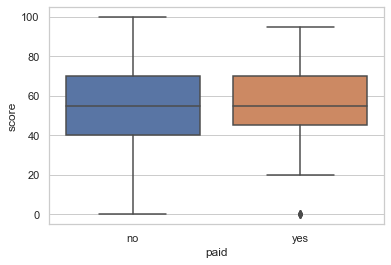

In [87]:
sns.boxplot(x='paid', y='score', data=df)
df.paid.value_counts()

In [88]:
diff_mean_values('paid', 'yes', 'no')

  Для paid=yes оценки на 9.2% лучше чем для paid=no     (mean: 55.0 против 50.36)


In [89]:
diff_score0_counts('paid')

     score_0  df_all  normalize_%
no        27     197    13.705584
yes        7     153     4.575163
  Для группы score=0 разница кол-ва нулевых оценок составляет: 9.1%


In [90]:
results['df_all paid: 0'] = 'Для paid=yes оценки на 9.2% лучше чем для paid=no'
results['score=0 paid: 0'] = 'Для двух крайних значений разница кол-ва нулевых оценок составляет: 9.0%'

### 19 activities — дополнительные внеучебные занятия (yes или no)

yes    192
no     183
Name: activities, dtype: int64

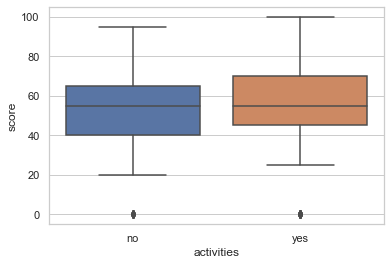

In [91]:
sns.boxplot(x='activities', y='score', data=df)
df.activities.value_counts()

In [92]:
diff_mean_values('activities', 'yes', 'no')

  Для activities=yes оценки на 0.9% лучше чем для activities=no     (mean: 52.68 против 52.19)


In [93]:
diff_score0_counts('activities')

     score_0  df_all  normalize_%
no        15     183     8.196721
yes       20     192    10.416667
  Для группы score=0 разница кол-ва нулевых оценок составляет: 2.2%


In [94]:
results['df_all activities: 0'] = 'Для activities=yes оценки на 0.9% лучше чем для activities=no'
results['score=0 activities: 0'] = 'Для двух крайних значений разница кол-ва нулевых оценок составляет: 2.2%'

### 20 nursery — посещал детский сад (yes или no)

yes    297
no      77
Name: nursery, dtype: int64

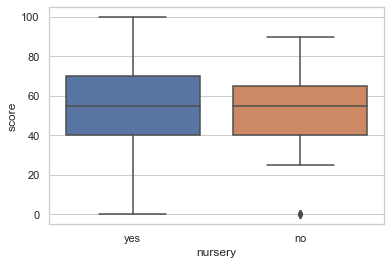

In [95]:
sns.boxplot(x='nursery', y='score', data=df)
df.nursery.value_counts()

In [96]:
diff_mean_values('nursery', 'yes', 'no')

  Для nursery=yes оценки на 5.9% лучше чем для nursery=no     (mean: 52.96 против 50.0)


In [97]:
diff_score0_counts('nursery')

     score_0  df_all  normalize_%
no         9      77    11.688312
yes       25     297     8.417508
  Для группы score=0 разница кол-ва нулевых оценок составляет: 3.3%


In [98]:
results['df_all nursery: 0'] = 'Для nursery=yes оценки на 5.9% лучше чем для nursery=no'
results['score=0 nursery: 0'] = 'Для двух крайних значений разница кол-ва нулевых оценок составляет: 3.1%'

### 21 studytime, granular

Данный параметр не имеет описания. Применим к нему те же методы анализа как и к остальным параметрам.

-6.0     189
-3.0     103
-9.0      63
-12.0     27
Name: studytime, granular, dtype: int64

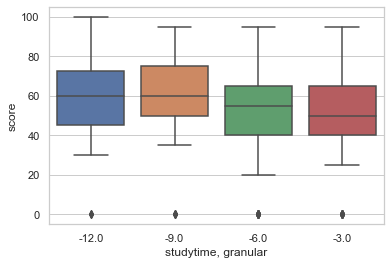

In [99]:
sns.boxplot(x='studytime, granular', y='score', data=df)
df['studytime, granular'].value_counts()

In [100]:
diff_mean_values('studytime, granular', -12, -3)

  Для studytime, granular=-12 оценки на 13.8% лучше чем для studytime, granular=-3     (mean: 56.3 против 49.47)


In [101]:
diff_score0_counts('studytime, granular')

       score_0  df_all  normalize_%
-12.0        3      27    11.111111
-9.0         5      63     7.936508
-6.0        16     189     8.465608
-3.0        13     103    12.621359
  Для группы score=0 разница кол-ва нулевых оценок составляет: 4.7%


In [102]:
results['df_all studytime, granular: +'] = 'Для granular=-12 оценки на 13.8% лучше чем для granular=-3'
results['score=0 studytime, granular: 0'] = 'Для двух крайних значений разница кол-ва нулевых оценок составляет: 4.8%'

### 22 higher — хочет получить высшее образование (yes или no)

yes    350
no      19
Name: higher, dtype: int64

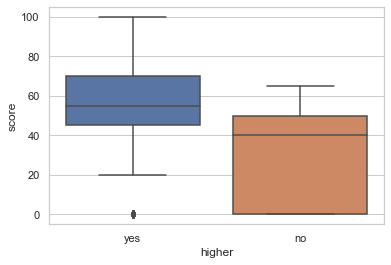

In [103]:
sns.boxplot(x='higher', y='score', data=df)
df.higher.value_counts()

In [104]:
diff_mean_values('higher', 'yes', 'no')

  Для higher=yes оценки на 57.7% лучше чем для higher=no     (mean: 53.1 против 33.68)


In [105]:
diff_score0_counts('higher')

     score_0  df_all  normalize_%
no         6      19    31.578947
yes       30     350     8.571429
  Для группы score=0 разница кол-ва нулевых оценок составляет: 23.0%


In [106]:
results['df_all higher: +'] = 'Для higher=yes оценки на 57.7% лучше чем для higher=no'
results['score=0 higher: +'] = 'Для двух крайних значений разница кол-ва нулевых оценок составляет: 23.2%'

### 23 internet — наличие интернета дома (yes или no)

yes    300
no      55
Name: internet, dtype: int64

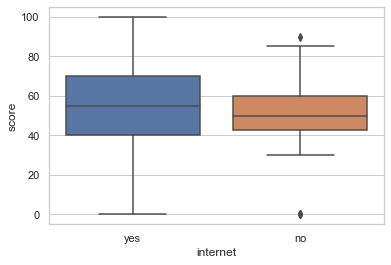

In [107]:
sns.boxplot(x='internet', y='score', data=df)
df.internet.value_counts()

In [108]:
diff_mean_values('internet', 'yes', 'no')

  Для internet=yes оценки на 8.2% лучше чем для internet=no     (mean: 53.12 против 49.09)


In [109]:
diff_score0_counts('internet')

     score_0  df_all  normalize_%
no         6      55    10.909091
yes       26     300     8.666667
  Для группы score=0 разница кол-ва нулевых оценок составляет: 2.2%


In [110]:
results['df_all internet: 0'] = 'Для internet=yes оценки на 8.2% лучше чем для internet=no'
results['score=0 internet: 0'] = 'Для двух крайних значений разница кол-ва нулевых оценок составляет: 2.2%'

### 24 romantic — в романтических отношениях (yes или no)

no     235
yes    123
Name: romantic, dtype: int64

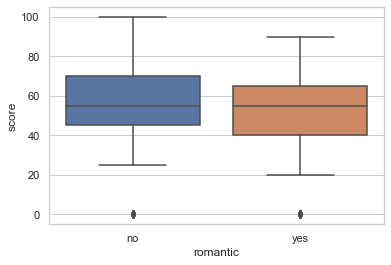

In [111]:
sns.boxplot(x='romantic', y='score', data=df)
df.romantic.value_counts()

In [112]:
diff_mean_values('romantic', 'no', 'yes')

  Для romantic=no оценки на 14.5% лучше чем для romantic=yes     (mean: 54.57 против 47.68)


In [113]:
diff_score0_counts('romantic')

     score_0  df_all  normalize_%
no        16     235     6.808511
yes       19     123    15.447154
  Для группы score=0 разница кол-ва нулевых оценок составляет: 8.6%


In [114]:
results['df_all romantic: +'] = 'Для romantic=no оценки на 14.5% лучше чем для romantic=yes'
results['score=0 romantic: 0'] = 'Для двух крайних значений разница кол-ва нулевых оценок составляет: 8.7%'

### 25 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

-1.0      1
 1.0      7
 2.0     17
 3.0     62
 4.0    178
 5.0     97
Name: famrel, dtype: int64

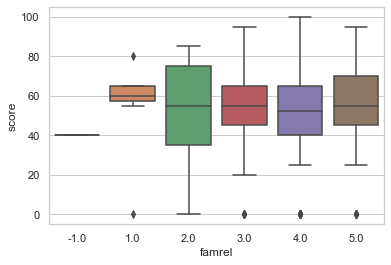

In [115]:
sns.boxplot(x='famrel', y='score', data=df)
df.famrel.value_counts().sort_index()

Убираем значение для параметра 'famrel' = '-1', - т.к. оно явно ошибочное и заменим значения 'famrel' = [1,2] на 'famrel'='3', т.к. они малочисленные.

In [116]:
df.loc[df.famrel < 1, 'famrel'] = None
df.famrel[df.famrel < 3] = 3

3.0     86
4.0    178
5.0     97
Name: famrel, dtype: int64

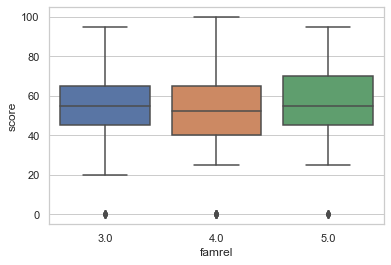

In [117]:
sns.boxplot(x='famrel', y='score', data=df)
df.famrel.value_counts().sort_index()

In [118]:
diff_mean_values('famrel', 5, 3)

  Для famrel=5 оценки на 7.3% лучше чем для famrel=3     (mean: 54.9 против 51.16)


In [119]:
diff_score0_counts('famrel')

     score_0  df_all  normalize_%
3.0       10      86    11.627907
4.0       15     178     8.426966
5.0        9      97     9.278351
  Для группы score=0 разница кол-ва нулевых оценок составляет: 3.2%


Для группы score=0 не будем использовать параметр famrel, т.к. по нему нет очень ненормальное распределение нулевых оценок и доверять таким данным нет оснований.

In [120]:
results['df_all famrel: 0'] = 'Для famrel=5 оценки на 13.1% лучше чем для famrel=1'
results['score=0 famrel: 0'] = 'Очень ненормальное распределение нулевых оценок'

### 26 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

1.0     18
2.0     63
3.0    152
4.0    110
5.0     37
Name: freetime, dtype: int64

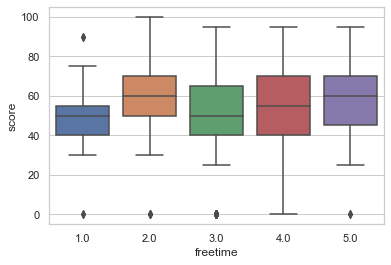

In [121]:
sns.boxplot(x='freetime', y='score', data=df)
df.freetime.value_counts().sort_index()

In [122]:
diff_mean_values('freetime', 5, 3)

  Для freetime=5 оценки на 15.1% лучше чем для freetime=3     (mean: 56.35 против 48.95)


In [123]:
diff_score0_counts('freetime')

     score_0  df_all  normalize_%
1.0        2      18    11.111111
2.0        4      63     6.349206
3.0       20     152    13.157895
4.0        8     110     7.272727
5.0        2      37     5.405405
  Для группы score=0 разница кол-ва нулевых оценок составляет: 7.8%


In [124]:
results['df_all freetime: +'] = 'Для freetime=5 оценки на 15.1% лучше чем для freetime=3'
results['score=0 freetime: 0'] = 'Для двух крайних значений разница кол-ва нулевых оценок составляет: 7.8%'

### 27 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

1.0     23
2.0    101
3.0    126
4.0     81
5.0     51
Name: goout, dtype: int64

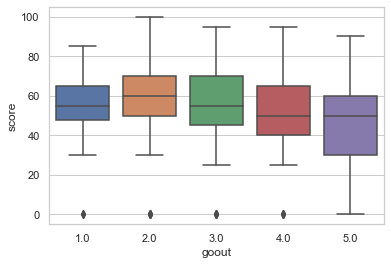

In [125]:
sns.boxplot(x='goout', y='score', data=df)
df.goout.value_counts().sort_index()

In [126]:
diff_mean_values('goout', 1, 5)

  Для goout=1 оценки на 10.9% лучше чем для goout=5     (mean: 49.35 против 44.51)


In [127]:
diff_score0_counts('goout')

     score_0  df_all  normalize_%
1.0        4      23    17.391304
2.0        9     101     8.910891
3.0        8     126     6.349206
4.0        7      81     8.641975
5.0        8      51    15.686275
  Для группы score=0 разница кол-ва нулевых оценок составляет: 11.0%


In [128]:
results['df_all goout: +'] = 'Для goout=1 оценки на 16.5% лучше чем для goout=5'
results['score=0 goout: +'] = 'Для двух крайних значений разница кол-ва нулевых оценок составляет: 11.1%'

### 28 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

1.0     47
2.0     42
3.0     88
4.0     60
5.0    137
Name: health, dtype: int64

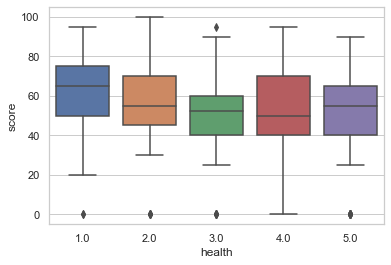

In [129]:
sns.boxplot(x='health', y='score', data=df)
df.health.value_counts().sort_index()

In [130]:
diff_mean_values('health', 1, 3)

  Для health=1 оценки на 17.3% лучше чем для health=3     (mean: 59.36 против 50.62)


In [131]:
diff_score0_counts('health')

     score_0  df_all  normalize_%
1.0        2      47     4.255319
2.0        6      42    14.285714
3.0        7      88     7.954545
4.0        7      60    11.666667
5.0       13     137     9.489051
  Для группы score=0 разница кол-ва нулевых оценок составляет: 10.0%


Такое распределение данных: максимумы нулевых оценок для health=[2, 4] и минимумы для health=[1, 3, 5] - не позволяет использовать эти данные в построении модели, т.к. доверять адекватности такому распределению оснований нет.

In [132]:
results['df_all health: +'] = 'Для health=1 оценки на 17.3% лучше чем для health=3'
results['score=0 health: 0'] = 'Не адекватное распределение нулевх оценок по данному параметру'

### 29 absences — количество пропущенных занятий

In [133]:
df.absences.describe()

count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [134]:
df.absences.value_counts().sort_index()

0.0      110
1.0        3
2.0       60
3.0        7
4.0       52
5.0        5
6.0       30
7.0        6
8.0       20
9.0        3
10.0      17
11.0       2
12.0      12
13.0       2
14.0      12
15.0       2
16.0       7
17.0       1
18.0       5
19.0       1
20.0       4
21.0       1
22.0       3
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
30.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
212.0      1
385.0      1
Name: absences, dtype: int64

Обратим внимание, что кол-во нечетных пропусков занятий на порядок меньше чем четных. Для упрощение анализа данные по нечетным значениям пропусков занятий объеденим с четными. И устраним правый хвост выброса (q75% + 1.5*IQR = 8+1.5*8=20).

In [135]:
df.absences[df.absences % 2 == 1] += 1
df.absences[df.absences > 20] = None

In [136]:
df.absences.value_counts().sort_index()

0.0     110
2.0      63
4.0      59
6.0      35
8.0      26
10.0     20
12.0     14
14.0     14
16.0      9
18.0      6
20.0      5
Name: absences, dtype: int64

Таким образом мы сократили кол-во групп с 35 до 11, с минимальными потерями данных.

<AxesSubplot:xlabel='absences', ylabel='score'>

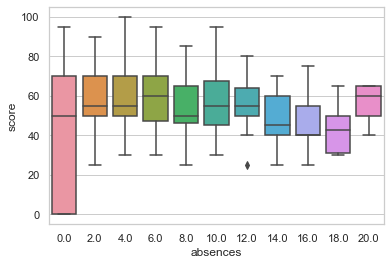

In [137]:
sns.boxplot(x='absences', y='score', data=df)

In [138]:
df.absences[df.score == 0].value_counts()

0.0    36
Name: absences, dtype: int64

Обратим внимание что все ученики набравшие на экзамене 0 баллов имеют почему-то 0 пропущенных занятий, что очень не логично. В связи с чем убирем эти данные из базы данных, так как они во первых занижают средний балл по категории absences=0, ну и во вторых, как уже писал выше, - не имеют логического обоснования. И еще уберем данные по категории absences=20, так как она очень малочисленна и имеет аномальный рост оценок.

In [139]:
df.absences[df.score == 0] = None
df.absences[df.absences == 20] = None

<AxesSubplot:xlabel='absences', ylabel='score'>

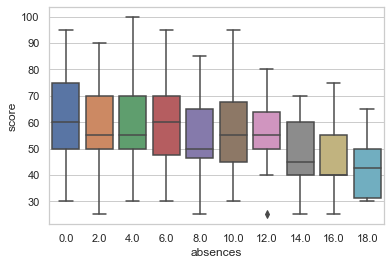

In [140]:
sns.boxplot(x='absences', y='score', data=df)

In [141]:
diff_mean_values('absences', 0, 18)

  Для absences=0 оценки на 45.3% лучше чем для absences=18     (mean: 62.97 против 43.33)


In [142]:
results['df_all absences: +'] = 'Для absences=0 оценки на 44.9% лучше чем для absences=18'
results['score=0 absences: 0'] = 'Все ученики сдавшие экзамен на 0 имели 0 прогулов, что не логично'

# Проведем корреляционный анализ количественных переменных

In [143]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.149255,-0.156606,0.078809,-0.017886,0.241958,0.017886,0.025126,-0.015185,0.120069,-0.077542,0.220803,-0.177261
Medu,-0.149255,1.000000,0.638822,-0.174283,0.082520,-0.241073,-0.082520,0.009930,0.041715,0.060215,-0.042729,0.045672,0.230728
Fedu,-0.156606,0.638822,1.000000,-0.133613,0.028795,-0.247521,-0.028795,-0.017645,-0.009069,0.048724,0.002923,-0.021416,0.139615
traveltime,0.078809,-0.174283,-0.133613,1.000000,-0.105910,0.043048,0.105910,-0.033211,-0.026299,0.032629,-0.011724,-0.082297,-0.070559
studytime,-0.017886,0.082520,0.028795,-0.105910,1.000000,-0.165019,-1.000000,0.049549,-0.125066,-0.053831,-0.079180,-0.071561,0.115741
failures,0.241958,-0.241073,-0.247521,0.043048,-0.165019,1.000000,0.165019,0.001781,0.076387,0.093948,0.120187,0.213229,-0.346450
"studytime, granular",0.017886,-0.082520,-0.028795,0.105910,-1.000000,0.165019,1.000000,-0.049549,0.125066,0.053831,0.079180,0.071561,-0.115741
famrel,0.025126,0.009930,-0.017645,-0.033211,0.049549,0.001781,-0.049549,1.000000,0.160871,0.074123,0.068951,-0.056152,0.059562
freetime,-0.015185,0.041715,-0.009069,-0.026299,-0.125066,0.076387,0.125066,0.160871,1.000000,0.296338,0.064315,0.080314,0.019026
goout,0.120069,0.060215,0.048724,0.032629,-0.053831,0.093948,0.053831,0.074123,0.296338,1.000000,-0.018026,0.148496,-0.129685


Видим полную обратную корреляцию между параметрами 'studytime, granular' и 'studytime', следовательно никакой новой информации второй из этих параметров не несет. Соответственно исключим один параметр из анализа (да и из данных его тоже можно исключить.

In [144]:
df.drop(['studytime, granular'], axis=1, inplace=True)
del results['df_all studytime, granular: +']
del results['score=0 studytime, granular: 0']

Посмотрим еще на корреляцию параметров для группы score=0:

In [145]:
df[df.score == 0].corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.277001,-0.308023,-0.173553,-0.043985,0.156184,0.060089,0.189722,0.090751,-0.224359,NaN,NaN
Medu,-0.277001,1.000000,0.763420,-0.139369,0.138471,-0.450749,-0.093115,0.178854,0.024078,-0.104942,NaN,NaN
Fedu,-0.308023,0.763420,1.000000,0.013349,0.243154,-0.305674,-0.113557,0.108777,0.126071,0.040732,NaN,NaN
traveltime,-0.173553,-0.139369,0.013349,1.000000,-0.141737,-0.152913,-0.035283,-0.067848,0.046303,-0.144564,NaN,NaN
studytime,-0.043985,0.138471,0.243154,-0.141737,1.000000,-0.319569,-0.086567,-0.102243,-0.223221,-0.000755,NaN,NaN
failures,0.156184,-0.450749,-0.305674,-0.152913,-0.319569,1.000000,-0.083497,-0.037953,-0.201397,0.198840,NaN,NaN
famrel,0.060089,-0.093115,-0.113557,-0.035283,-0.086567,-0.083497,1.000000,0.137271,0.279452,-0.065689,NaN,NaN
freetime,0.189722,0.178854,0.108777,-0.067848,-0.102243,-0.037953,0.137271,1.000000,0.319699,-0.017763,NaN,NaN
goout,0.090751,0.024078,0.126071,0.046303,-0.223221,-0.201397,0.279452,0.319699,1.000000,-0.093742,NaN,NaN
health,-0.224359,-0.104942,0.040732,-0.144564,-0.000755,0.198840,-0.065689,-0.017763,-0.093742,1.000000,NaN,NaN


По данной группе видим высокую степень корреляции даных по параметрам Medu и Fedu, - но мы их и так исключили на этапе предварительного анализа.

# Проведем анализ всех параметров с помощью теста Стьюдента

Найдем статистически значимые различия для всех значений парметров при уровне pvalue <= 0.1:

In [146]:
ttest_columns = []
for column in df.columns:
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue <= 0.1 / len(combinations_all):
            ttest_columns.append(column)
            break

print(ttest_columns)

['sex', 'address', 'Medu', 'Fedu', 'Mjob', 'failures', 'schoolsup', 'paid', 'higher', 'romantic', 'goout', 'absences', 'score']


Сформируем список параметров отобранных в рамках предварительного анализа:

In [147]:
column_average_score = list()
for i in results:
    if 'df_all' in i and i[-1] == '+':
        column_average_score.append(i[7:-3])
print(column_average_score)        

['age', 'address', 'Medu', 'Fedu', 'Mjob', 'reason', 'guardian', 'studytime', 'failures', 'schoolsup', 'higher', 'romantic', 'freetime', 'goout', 'health', 'absences']


Выведем какие параметры отобрал тест Стьюдента, которые мы не учли в рамках предварительного анализа:

In [148]:
for i in ttest_columns:
    if i not in column_average_score:
        print(i)

sex
paid
score


Добавим параметры 'sex' и 'paid' в итоговый список исследуемых параметров:

In [149]:
column_average_score.append('sex')
column_average_score.append('paid')
print(column_average_score)

['age', 'address', 'Medu', 'Fedu', 'Mjob', 'reason', 'guardian', 'studytime', 'failures', 'schoolsup', 'higher', 'romantic', 'freetime', 'goout', 'health', 'absences', 'sex', 'paid']


# ВЫВОДЫ

## Основные решения к подходу в анализе данных:

    1) Критерием для включения параметра в модель обозначили отличее минимум в 10% для наибольшего и наименьшего значения средних оценок внутри групп данного параметра;
    2) Построение предсказывающей модели будет производится на основании двух отличных гипотез (и соответственно для каждой гипотезы будут отбираться различные параметры):
        - существует набор параметром которые предсказывают вероятность сдачи экзамена на 0 баллов;
        - существует набор параметром которые предсказывают вероятность сдачи экзамена от 20 до 100 баллов;
    

## Резюме по обработке исходных данных:

    1) удалили строки с пустыми значениями в ключевом параметре - score (6 строк);
    2) удалили значение '20' для группы 'age', - т.к. группа малочислена (3чел) и нарушает тенденцию по данному параметру;
    3) удалили значение '0' для группы 'Medu', - т.к. группа малочислена (3чел) и нарушает тенденцию по данному параметру;
    4) удалили ошибочное значение для параметра 'Fedu': '40';
    5) удалили значение '0' для группы 'Fedu', - т.к. группа малочислена (2чел) и нарушает тенденцию по данному параметру;
    
    Учитывая низкую выборку для значений n = [2, 3] и существенное отличие между средними оценками для n=0 и n =[1, 2, 3] объеденим в одну группу значения [1, 2, 3]:
    
    6) удалили ошибочное значение для параметра 'famrel': '-1';
    7) заменим значения score для 'famrel'='1' на среднее по группе 'famrel'='2', - т.к. группа малочислена (7чел) и нарушает тенденцию по данному параметру;
    8) удалим полностью столбец 'studytime, granular' - т.к. данные по нему составляют полную обратную корреляциюпараметру 'studytime';
    9) в параметре absences объеденим данные по нечетным значениям пропусков занятий с четными - т.к. кол-во нечетных пропусков занятий на порядок меньше чем четных (для упрощение анализа и сокращения групп параметра);
    10) устраним правый хвост выброса для параметра absences (больше величины q75% + 1.5IQR).

## Итоговый результат по отбору параметров для построения модели:

Сформируем два списка параметров используя сформировнный словарь results:

    - один для прогнозирования оценки по математике;
    - второй для прогнозирования сдачи экзамена на 0 баллов.

In [150]:
print(f'Всего отобранно {len(column_average_score)} параметров для прогнозирования оценки по математике:')
print(column_average_score)
        
n, column_zero_score = 0, list()
for i in results:
    if 'score=0' in i and i[-1] == '+':
        n += 1
        column_zero_score.append(i[8:-3])
print(f'\nВсего отобранно {n} параметров для прогнозирования сдачи экзамена на 0 баллов:')
print(column_zero_score)

Всего отобранно 18 параметров для прогнозирования оценки по математике:
['age', 'address', 'Medu', 'Fedu', 'Mjob', 'reason', 'guardian', 'studytime', 'failures', 'schoolsup', 'higher', 'romantic', 'freetime', 'goout', 'health', 'absences', 'sex', 'paid']

Всего отобранно 5 параметров для прогнозирования сдачи экзамена на 0 баллов:
['age', 'Medu', 'failures', 'higher', 'goout']
